# Loan Application Status Prediction

### Problem statement 

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

## The Data

Loading the data by reading the csv file as data frame

In [2]:
df=pd.read_csv('loan-status.csv')

## Exploratory Data Analysis

Exploratory Data Analysis is use to answer all the question like test assumptions, Analysis the data. The main use of it to prepare the data for modeling

there are lot of ways to reach the goals, we can get a basic description of the data,visualize it identify patterens in it, identify the callenges of using data,etc

### Statistical summary

Summarizing your dataset through descriptive statistics, to use a variety of measurements to better understand your dataset.

##### shape function

shape function gives the dimention of dataframe

In [3]:
df.shape

(614, 13)

we have 614 rows and 13 columns in dataframe

##### head() function

head() function is to display the first 5 rows of dataframe

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##### tail() function

tail() function is use to display last 5 row of data frame

In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


#####  sample() function

sample() function is show the sample randomly

In [6]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
474,LP002524,Male,No,2,Graduate,No,5532,4648.0,162.0,360.0,1.0,Rural,Y
375,LP002211,Male,Yes,0,Graduate,No,4817,923.0,120.0,180.0,1.0,Urban,Y
38,LP001114,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y
347,LP002131,Male,Yes,2,Not Graduate,No,3083,2168.0,126.0,360.0,1.0,Urban,Y
342,LP002119,Male,Yes,1,Not Graduate,No,4554,1229.0,158.0,360.0,1.0,Urban,Y
309,LP001998,Male,Yes,2,Not Graduate,No,7667,0.0,185.0,360.0,NaN,Rural,Y
290,LP001936,Male,Yes,0,Graduate,No,3075,2416.0,139.0,360.0,1.0,Rural,Y
247,LP001819,Male,Yes,1,Not Graduate,No,6608,0.0,137.0,180.0,1.0,Urban,Y
40,LP001119,Male,No,0,Graduate,No,3600,0.0,80.0,360.0,1.0,Urban,N


##### dtype function

dtypes is use to disply the datatype of data frame

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

[Loan_ID,Gender,Married,Dependents,Education,Self_Employed, Property_Area,Loan_Status] listed columns are object dtypes, ApplicantIncome is int64 dtype and [CoapplicatIncom,LoanAmount,Loan_Amount_Term,Credit_History] are float dtype

##### info() function

info() function gives the RangeIndex,total columns in dataframe,column names, non-null count, dtype of dataframe,dypes count in dataframe, memory usage

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


we have 614 entries are as RangeIndex 0 to 613. and total 13 columns in this dataframe, in Gender has 601 non-null values, Married 611 non-null values, Dependents we have 599 non-null values and Self_Employed we have 582 non-null values,LoanAmount has 592 Non-null values and Credit_Histroy has 564 nano-null values and remaining columns has 614 non-null values and 4columns are in float64 dtype, one column is in int64 dtype and 8 columns are in object dtypes and we have 62.5+ KB 

##### isnull() function

isnull() function is use to know the null values in data frame, it give th values True and False 

if value is True it indicates null vlaue,else it give false

In [9]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


we have null values in the data frame where we have null value it gives True 

##### isnull().sum() function

isnull().sum() it give the count of null values present in column 

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender column has 13 null values, Married has 3 null values, Dependents has 15 null values, Self_Employed has 32 null values, LoanAmount has 22 null values, Loan_Amount_Term has 14 null values and Credit_History has 50 null values in dataframe

### Describe the data

describe function gives the imfomation of count of variables that used to calculate if their is null values that shows less numberrow rows than given in dimention, and function also it gives the infomation of mean, standard deviation,minimum value,25th percentile,50th percentile(which is median),75th percentile and in last it gives maximum value of each column 

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observations:

we can observe that all the columns, mean is more than median(50th percentile) 

and also observe that difference between max value and 75th percentile is very high except Credit_Histroy column

the both observe clear that data has ouliers 

## Data Visualization

Data visualization is a technique that uses an array of static and interactive visuals within a specific context to help people understand and make sense of large amounts of data. The data is often displayed in a story format that visualizes patterns, trends and correlations that may otherwise go unnoticed.


we are using two libraries 

1.matplotlib.pyplot

2.seaborn

<AxesSubplot:>

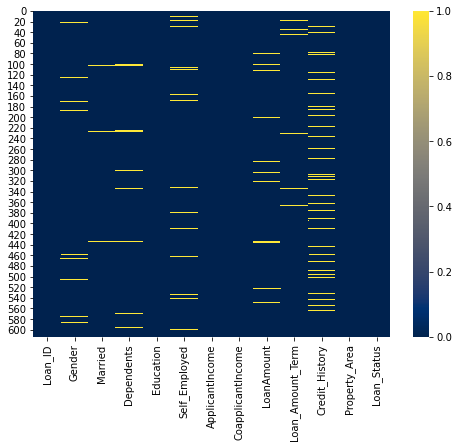

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cmap='cividis')

in above plot shows that we have null values in the dataframe where we got yellow shade in that place we have null values 

### Handling nan values

as first step to analyse the dataframe we need to full nan values

for numerical dtype columns fill nan values with mean value of column and for object dtype columns fill nan values with mode value

Gender13 null values,
Married 3 null values,
Dependents  15 null values,
Self_Employed  32 null values,
LoanAmount 22 null values,
Loan_Amount_Term 14 null values
Credit_History 50 null values

In [13]:
df['Gender'].mode()

0    Male
dtype: object

In [14]:
df['Gender'].fillna('Male',inplace=True)

In [15]:
df['Married'].mode()

0    Yes
dtype: object

In [16]:
df['Married'].fillna("Yes",inplace=True)

In [17]:
df['Dependents'].mode()

0    0
dtype: object

unique is filled with numbers but it is in object dtype, so here we use mode value to fill the nan values

In [18]:
df['Dependents'].fillna('0',inplace=True)

In [19]:
df['Self_Employed'].mode()

0    No
dtype: object

In [20]:
df['Self_Employed'].fillna('No',inplace=True)

In [21]:
df['LoanAmount'].mean()

146.41216216216216

In [22]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [23]:
df['Loan_Amount_Term'].mean()

342.0

In [24]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [25]:
df['Credit_History'].mode()

0    1.0
dtype: float64

Here in Credit_History column we have only values 0 and 1 so here we use to fill with mode only

In [26]:
 df['Credit_History'].fillna(1.0,inplace=True)

In [27]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

clear all null values we can delete entries where we have nan values but we lost more data by this techinques we don't have any changes in data we get same mean mode values for columns just handle the nan values we use this techniques

Male      502
Female    112
Name: Gender, dtype: int64

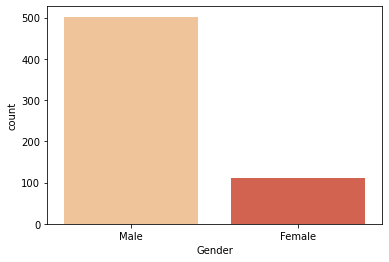

In [28]:
sns.countplot(df['Gender'],palette='OrRd')
df['Gender'].value_counts()

we have 502 male as 112 female as per our data

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

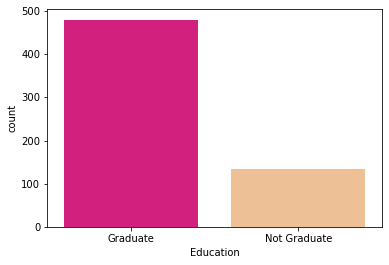

In [29]:
sns.countplot(df['Education'],palette='Accent_r')
df['Education'].value_counts()

here we have 480 Graduate and 134 Not Graduate are there in dataframe

<AxesSubplot:xlabel='Gender'>

<Figure size 1152x576 with 0 Axes>

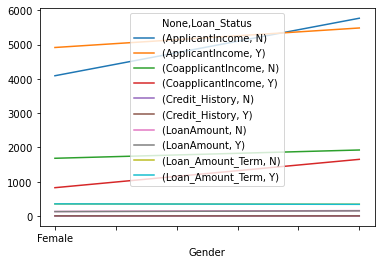

In [30]:
plt.figure(figsize=(16,8))
df.pivot_table(df,index='Gender',columns='Loan_Status').plot()

In [31]:
df.pivot_table(df,index='Gender', columns='Loan_Status')

ApplicantIncome              CoapplicantIncome               \
Loan_Status               N            Y                 N            Y   
Gender                                                                    
Female          4091.351351  4915.853333       1682.783784   824.453333   
Male            5769.464516  5485.268012       1924.361290  1651.504092   

            Credit_History            LoanAmount             Loan_Amount_Term  \
Loan_Status              N         Y           N           Y                N   
Gender                                                                          
Female            0.567568  0.986667  129.173302  126.264324       350.756757   
Male              0.574194  0.982709  156.142720  148.258529       342.387097   

                        
Loan_Status          Y  
Gender                  
Female       352.64000  
Male         338.59366

A Pivot Table is used to summarise, sort, reorganise, group, count, total or average data stored in a table 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

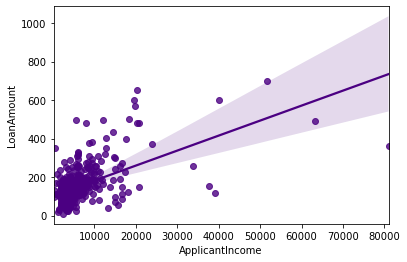

In [32]:
sns.regplot(x=df['ApplicantIncome'],y=df['LoanAmount'],color='indigo')

regplot is used to plot data and a linear regression model fit.

both columns are has good correlation and it has best fit for linear regression 

{'bodies': [<matplotlib.collections.PolyCollection at 0x1dc37769e80>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1dc37769c10>,
 'cmins': <matplotlib.collections.LineCollection at 0x1dc377697c0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1dc37769970>}

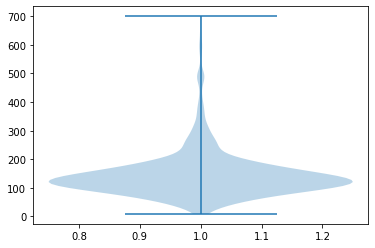

In [33]:
plt.violinplot(df['LoanAmount'])

Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

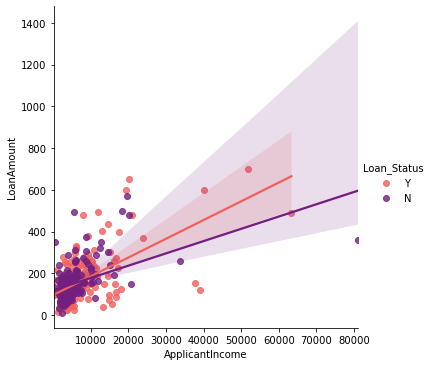

In [34]:
sns.lmplot(x="ApplicantIncome", y="LoanAmount", hue="Loan_Status", data=df,palette='magma_r')

LoanAmount is depends on the ApplicantIncome 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

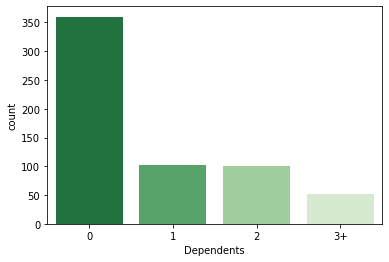

In [35]:
sns.countplot(df['Dependents'],palette='Greens_r')

Dependents column is about that how many members are dependent on applicant.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

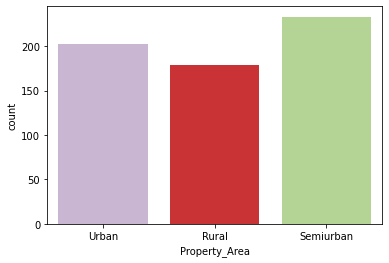

In [36]:
sns.countplot(df['Property_Area'],palette='Paired_r')

Property_Area column is about the assurance of applicate property we have 3 types of Areas Urban,Rural,Semiurban

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

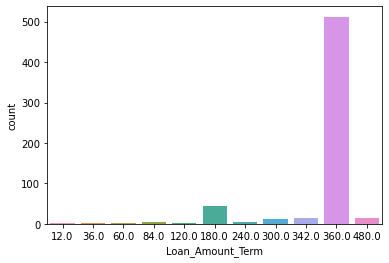

In [37]:
sns.countplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

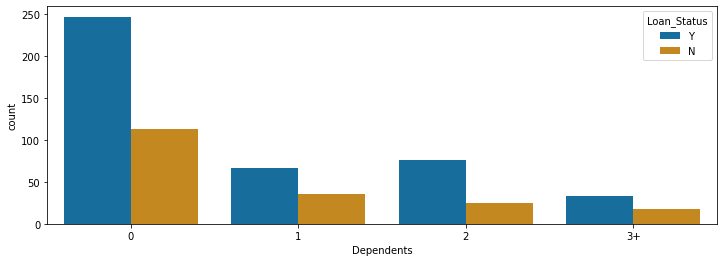

In [38]:
plt.subplots(figsize=(12,4))
sns.countplot(x = 'Dependents', hue = 'Loan_Status', data = df, palette = 'colorblind',ax=None)

In [39]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [40]:
df['Married'] = df['Married'].apply(lambda x: 1 if x == 'Yes' else 0)

In [41]:
df['Self_Employed'] = df['Self_Employed'].apply(lambda x: 1 if x == 'Yes' else 0)

In [42]:
df['Education'] = df['Education'].apply(lambda x: 1 if x == 'Graduate' else 0)

In [43]:
df['Property_Area'] = df['Property_Area'].map({'Urban':2,'Rural':0,'Semiurban':1})

In [44]:
df['Dependents'] = df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [45]:
df['Loan_Status'] = df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)

In [46]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


### Check Correlation

Correlation means association - more precisely it is a measure of the extent to which two variables are related. There are three possible results of a correlational study: a positive correlation, a negative correlation, and no correlation.

A positive correlation is a relationship between two variables in which both variables either increase or decrease at the same time. An example would be height and weight. Taller people tend to be heavier.

A negative correlation is a relationship between two variables in which an increase in one variable is associated with a decrease in the other. An example would be height above sea level and temperature. As you climb the mountain (increase in height) it gets colder (decrease in temperature).

A zero correlation exists when there is no relationship between two variables. For example, there is no relationship between the amount of tea drunk and level of intelligence.

### Strength of correlation
prefect +1,-1

strong +(0.9 to 0.7) & (-0.9 to -0.7)

moderate +(0.6 to 0.4) & (-0.6 to -0.4)

week +(0.3 to 0.1) & (-0.3 to -0.1)

Zero 0

In [47]:
dfcor=df.corr()
dfcor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,-0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.073658,0.065243,0.085884
Self_Employed,-0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556


<AxesSubplot:>

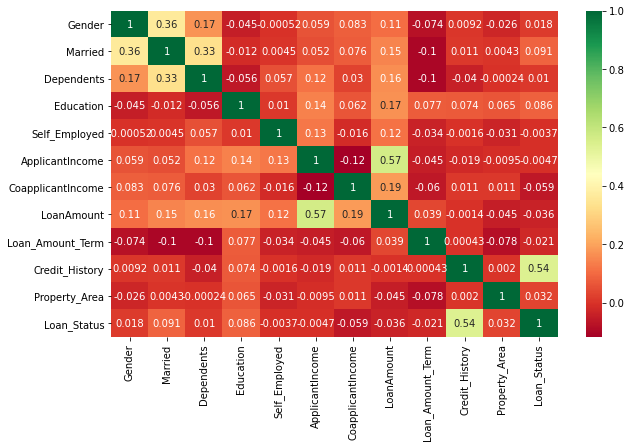

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='RdYlGn',annot=True)

we have Self_Employed,ApplicantIncome are very week correlation with our target variable(Loan_Status)

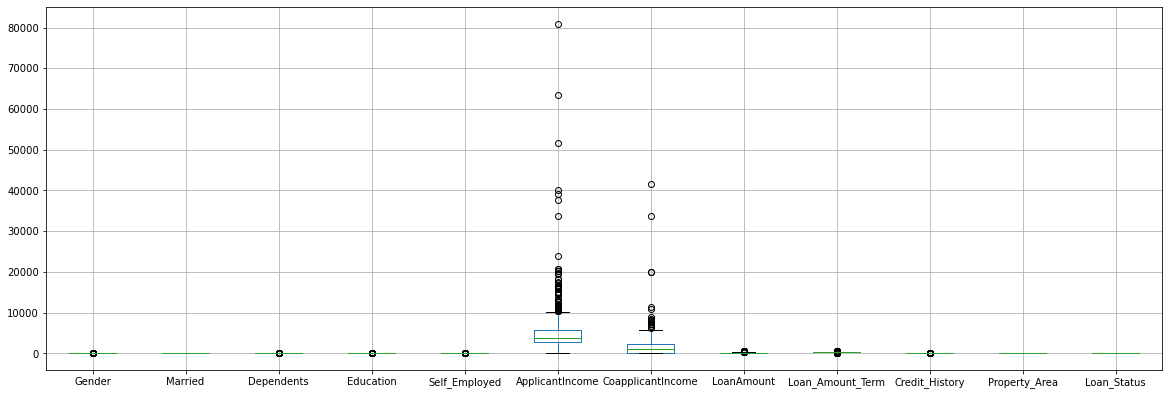

In [49]:
df.boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

## Define function 

In [50]:
def plot(feature_name):
    sns.set(style = "darkgrid")
    plt.figure(figsize=(6,6))
    sns.distplot(df[feature_name],color='orange')
    plt.figure(figsize=(6,6))
    sns.set(style = "whitegrid")
    sns.boxplot(df[feature_name],color='red')

In [51]:
def outlier_norm(feature):
    uppper_boundary=df[feature].mean() + 3* df[feature].std()
    lower_boundary=df[feature].mean() - 3* df[feature].std()
    print("lower_boundary:",lower_boundary), print("uppper_boundary",uppper_boundary)

In [52]:
def outlier_IQR(feature):
    IQR=df[feature].quantile(0.75)-df[feature].quantile(0.25)
    lower_boundary=df[feature].quantile(0.25)-(IQR*1.5)
    upper_boundary=df[feature].quantile(0.75)+(IQR*1.5)
    print("lower_boundary:",lower_boundary), print("uppper_boundary",upper_boundary)

## Skewness

skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined

In [53]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

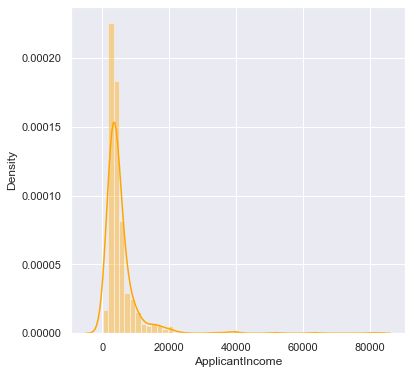

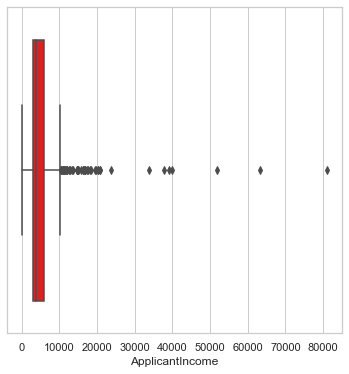

In [54]:
plot('ApplicantIncome')

we have outliers and data is right skewed

In [55]:
outlier_IQR('ApplicantIncome')

lower_boundary: -1498.75
uppper_boundary 10171.25


In [57]:
df.loc[df['ApplicantIncome']>10171.25,'ApplicantIncome']=10171.25

In [58]:
min(df['ApplicantIncome']),max(df['ApplicantIncome'])

(150.0, 10171.25)

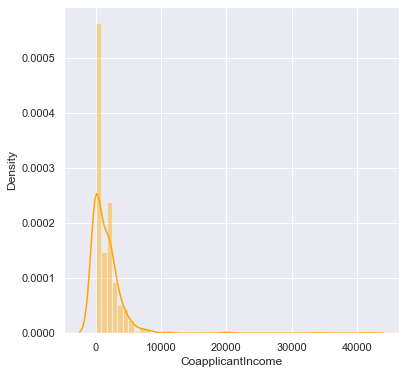

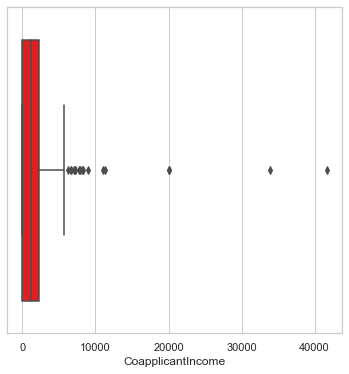

In [59]:
plot('CoapplicantIncome')

data is right skewed and we have outliers are present

In [60]:
outlier_IQR('CoapplicantIncome')

lower_boundary: -3445.875
uppper_boundary 5743.125


In [61]:
df.loc[df['CoapplicantIncome']>5743.125,'CoapplicantIncome']=5743.125

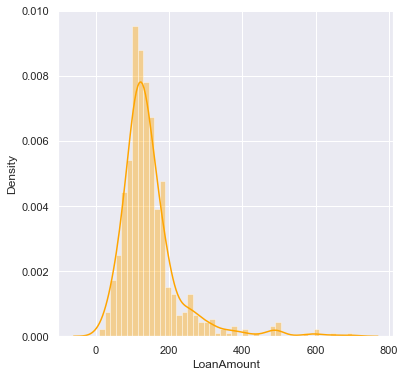

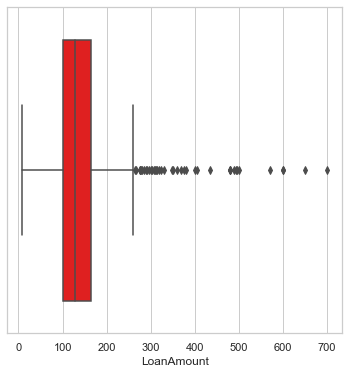

In [62]:
plot('LoanAmount')

we have datadistribution is right skewed and outliers are presents

In [63]:
outlier_IQR('LoanAmount')

lower_boundary: 3.5
uppper_boundary 261.5


In [64]:
df.loc[df['CoapplicantIncome']>261.5,'CoapplicantIncome']=261.5

In [65]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [66]:
df=df.drop('Loan_ID',axis=1)

## Dividing the depend variable and features

In [67]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [68]:
x.shape

(614, 11)

In [69]:
y.shape

(614,)

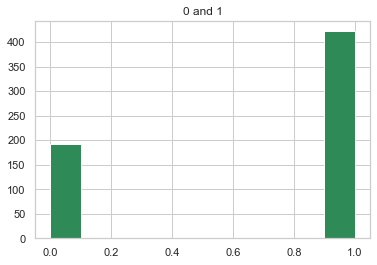

In [70]:
y.hist(grid=True,color='seagreen')
plt.title("0 and 1")
plt.show()

we have imbalance in data

## Resampling 

In [71]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler()
x_res,y_res=us.fit_resample(x,y)

In [72]:
x_res.shape,y_res.shape

((384, 11), (384,))

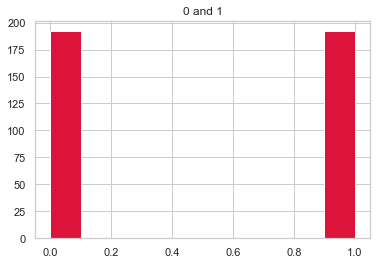

In [73]:
y_res.hist(grid=True,color='crimson')
plt.title("0 and 1")
plt.show()

## Finding best random state

In [74]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=30,random_state=i)
    le=LogisticRegression()
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is",maxAccu,"on random_state", maxRS)

Best accuracy score is 0.9 on random_state 78


#### Preparing list with models

In [75]:
model=[]
model.append(LogisticRegression())
model.append(DecisionTreeClassifier())
model.append(RandomForestClassifier())
model.append(SVC())
model.append(AdaBoostClassifier())
model.append(GradientBoostingClassifier())
model.append(KNeighborsClassifier())

### train_test_split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=30,random_state=78)

In [77]:
for m in model:
    print('model name:',m)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("accuracy score:",accuracy_score(y_test,pred))
    print("confusion matrix:",confusion_matrix(y_test,pred))
    print("classification report:",classification_report(y_test,pred))
    print("roc_auc_score:",roc_auc_score(y_test,m.predict(x_test)))
    print("Cross validation score:")
    scr=cross_val_score(m,x,y,cv=5)
    print(scr.mean())

model name: LogisticRegression()
accuracy score: 0.9
confusion matrix: [[10  3]
 [ 0 17]]
classification report:               precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.85      1.00      0.92        17

    accuracy                           0.90        30
   macro avg       0.93      0.88      0.89        30
weighted avg       0.91      0.90      0.90        30

roc_auc_score: 0.8846153846153846
Cross validation score:
0.7931893909103025
model name: DecisionTreeClassifier()
accuracy score: 0.6333333333333333
confusion matrix: [[10  3]
 [ 8  9]]
classification report:               precision    recall  f1-score   support

           0       0.56      0.77      0.65        13
           1       0.75      0.53      0.62        17

    accuracy                           0.63        30
   macro avg       0.65      0.65      0.63        30
weighted avg       0.67      0.63      0.63        30

roc_auc_score: 0.6493212

After applying the different machine learning algorithms we got AdaBoostClassifier as best algorithm for this

## Hyper parameter Tuning 

In [78]:
from sklearn.model_selection import GridSearchCV

In [80]:
ABC = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

gcv = GridSearchCV(ABC, parameters,verbose=3,scoring='f1',n_jobs=-1)
gcv.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8, 10],
                         'base_estimator__min_samples_leaf': [5, 10],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='f1', verbose=3)

In [82]:
gcv_pred=gcv.predict(x_test)

In [84]:
gcv.best_params_

{'base_estimator__max_depth': 2,
 'base_estimator__min_samples_leaf': 10,
 'learning_rate': 0.01,
 'n_estimators': 50}

In [85]:
print("accuracy score:",accuracy_score(y_test,gcv_pred))
print("roc_auc_score:",roc_auc_score(y_test,gcv_pred))

accuracy score: 0.8333333333333334
roc_auc_score: 0.8348416289592759


In [87]:
logit_roc_auc1=roc_auc_score(y_test,gcv_pred)
fpr,tpr,thresholds=roc_curve(y_test,gcv.predict_proba(x_test)[:,1])

In [88]:
fpr

array([0.        , 0.07692308, 0.07692308, 0.15384615, 0.15384615,
       0.15384615, 0.15384615, 0.23076923, 0.46153846, 0.61538462,
       1.        ])

In [89]:
tpr

array([0.        , 0.05882353, 0.35294118, 0.41176471, 0.52941176,
       0.70588235, 0.82352941, 1.        , 1.        , 1.        ,
       1.        ])

In [90]:
thresholds

array([1.65158983e+00, 6.51589827e-01, 6.24043484e-01, 6.08539797e-01,
       6.07716784e-01, 5.20115102e-01, 5.10232747e-01, 4.97498188e-01,
       6.58547709e-04, 9.51375298e-05, 8.52386394e-08])

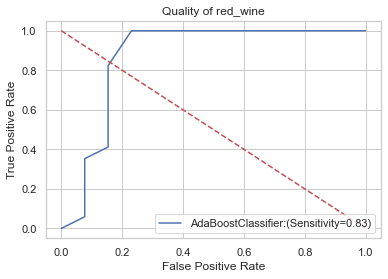

In [91]:
plt.figure()
plt.plot(fpr,tpr,label='AdaBoostClassifier:(Sensitivity=%0.2f)'%logit_roc_auc1)
plt.plot([0,1],[1,0],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Quality of red_wine')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

## Saving the model

In [92]:
import joblib
joblib.dump(gcv,"loan-Application-Status-Prediction-project.pkl")

['loan-Application-Status-Prediction-project.pkl']

## Load the saved model

In [93]:
model=joblib.load('loan-Application-Status-Prediction-project.pkl')

In [94]:
pred=model.predict(x_test)

In [95]:
print("accuracy score:",accuracy_score(y_test,gcv_pred))
print("roc_auc_score:",roc_auc_score(y_test,gcv_pred))

accuracy score: 0.8333333333333334
roc_auc_score: 0.8348416289592759


In [96]:
pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)